In [1]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200
from afqinsight import AFQDataset
from afqinsight.nn.utils import prep_pytorch_data
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torch.distributions.normal import Normal
from sklearn.decomposition import PCA
import afqinsight.augmentation as aug
from afqinsight.nn.pt_models import Conv1DVariationalAutoencoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
vae = Conv1DVariationalAutoencoder(num_tracts=1, latent_dims=10, dropout=0.1)

In [3]:
import sys
# Adjust path as needed
# sys.path.insert(1, '/mmfs1/gscratch/nrdg/samchou/AFQ-Insight-Autoencoder-Experiments/Experiment_Utils')
sys.path.insert(1, '/Users/samchou/AFQ-Insight-Autoencoder-Experiments/AFQ-Insight-Autoencoder-Experiments/Experiment_Utils')
# Import necessary functions, including the new one
from utils import select_device, kl_divergence_loss,prep_fa_flattned_data, prep_fa_flattened_remapped_data, train_vae_age_site_staged, prep_fa_dataset, prep_fa_dataset_paired
from models import Conv1DVariationalAutoencoder_fa, AgePredictorCNN, SitePredictorCNN, CombinedVAE_Predictors

In [4]:
device = select_device()

Using device: mps

Using MPS backend on macOS. (Detailed memory info may not be available.)


In [5]:
dataset = AFQDataset.from_study('hbn')
torch_dataset, train_loader, test_loader, val_loader = prep_pytorch_data(dataset,batch_size=128)

File /Users/samchou/.cache/afq-insight/hbn/subjects.tsv exists.
File /Users/samchou/.cache/afq-insight/hbn/nodes.csv exists.


/Users/samchou/src/nrdg/AFQ-Insight/afqinsight/transform.py:144: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  features = interpolated.stack(["subjectID", "tractID", "metric"]).unstack(


In [29]:
torch_dataset_fa, train_loader_fa, test_loader_fa, val_loader_fa = prep_fa_dataset_paired(
        dataset, target_labels="dki_fa", batch_size=128
)

FA indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

torch.Size([24, 100])


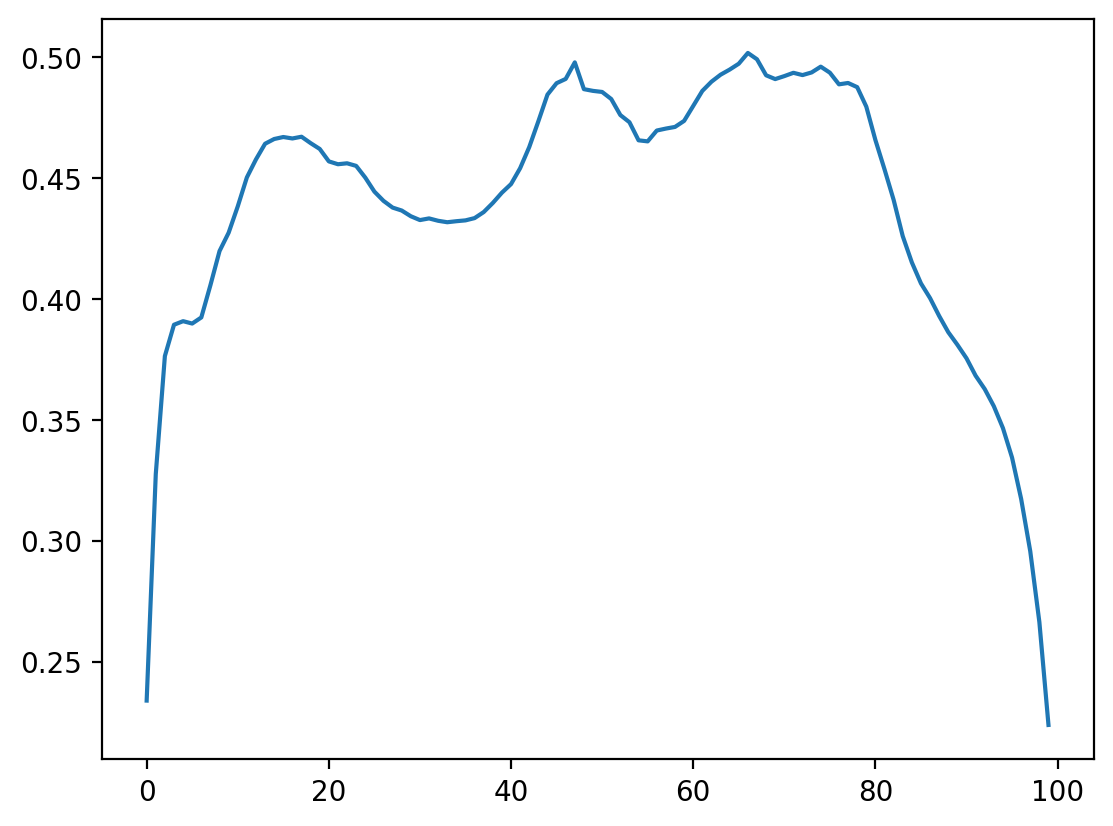

In [37]:
# Print the shape of the first sample's FA tract data
print(train_loader_fa.dataset[0][0].shape)

# Convert the first sample's FA tract data to a numpy array
arr = np.array(train_loader_fa.dataset[0][0])


# Plot the concatenated tracts data, transposed to show each tract as a line
plt.plot(arr[2])
plt.show()



In [30]:
print(train_loader_fa.dataset[0][0].shape)



torch.Size([24, 100])


In [7]:
print(train_loader.dataset[0][1][2])

print(dataset.feature_names)


tensor(4.)
[('dki_fa', 'ARC_L', 0), ('dki_fa', 'ARC_L', 1), ('dki_fa', 'ARC_L', 2), ('dki_fa', 'ARC_L', 3), ('dki_fa', 'ARC_L', 4), ('dki_fa', 'ARC_L', 5), ('dki_fa', 'ARC_L', 6), ('dki_fa', 'ARC_L', 7), ('dki_fa', 'ARC_L', 8), ('dki_fa', 'ARC_L', 9), ('dki_fa', 'ARC_L', 10), ('dki_fa', 'ARC_L', 11), ('dki_fa', 'ARC_L', 12), ('dki_fa', 'ARC_L', 13), ('dki_fa', 'ARC_L', 14), ('dki_fa', 'ARC_L', 15), ('dki_fa', 'ARC_L', 16), ('dki_fa', 'ARC_L', 17), ('dki_fa', 'ARC_L', 18), ('dki_fa', 'ARC_L', 19), ('dki_fa', 'ARC_L', 20), ('dki_fa', 'ARC_L', 21), ('dki_fa', 'ARC_L', 22), ('dki_fa', 'ARC_L', 23), ('dki_fa', 'ARC_L', 24), ('dki_fa', 'ARC_L', 25), ('dki_fa', 'ARC_L', 26), ('dki_fa', 'ARC_L', 27), ('dki_fa', 'ARC_L', 28), ('dki_fa', 'ARC_L', 29), ('dki_fa', 'ARC_L', 30), ('dki_fa', 'ARC_L', 31), ('dki_fa', 'ARC_L', 32), ('dki_fa', 'ARC_L', 33), ('dki_fa', 'ARC_L', 34), ('dki_fa', 'ARC_L', 35), ('dki_fa', 'ARC_L', 36), ('dki_fa', 'ARC_L', 37), ('dki_fa', 'ARC_L', 38), ('dki_fa', 'ARC_L', 39)

Total samples: 1194
Missing site values (NaN): 0 (0.00%)
Most common site in training set: 0
Baseline accuracy (always predicting most common site): 0.4147

Subject count by site:
Site 0.0: 493 subjects
Site 1.0: 48 subjects
Site 3.0: 486 subjects
Site 4.0: 167 subjects


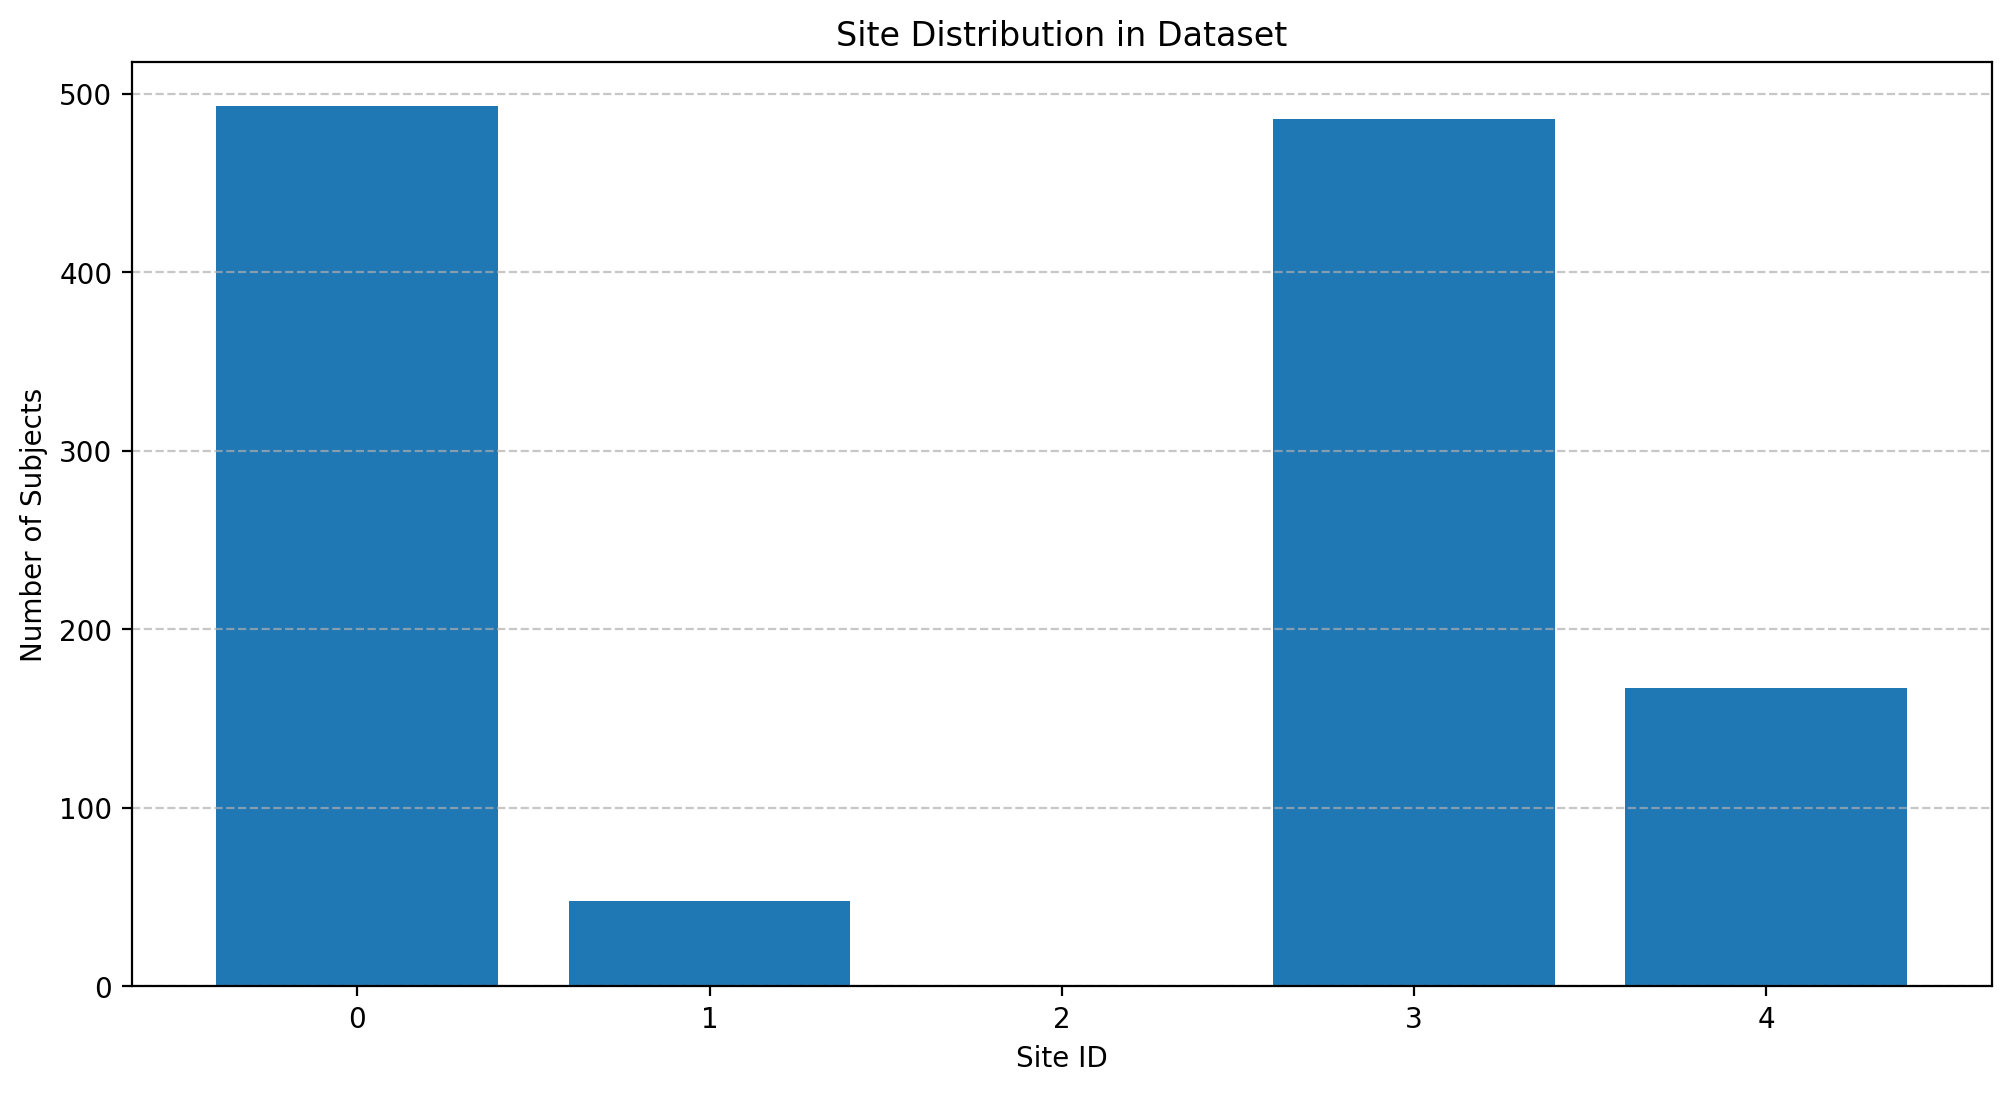

Batch 1 site labels sample: tensor([[13.0500],
        [ 8.3851],
        [12.2481],
        [ 8.0893],
        [10.3201]])
Batch 2 site labels sample: tensor([[ 9.4878],
        [ 8.0477],
        [ 8.0532],
        [11.7575],
        [ 7.7470]])
Batch 3 site labels sample: tensor([[ 8.4995],
        [17.4221],
        [14.3207],
        [ 7.4071],
        [20.1248]])


In [ ]:
# Calculate baseline accuracy if we just predict the most common site for everyone
all_sites = []
missing_site_count = 0
total_samples = 0

# Collect all site values from training set
for x, labels in train_loader:
    site_values = labels[:, 2].float().unsqueeze(1)
    
    # Filter out NaN values
    valid_mask = ~torch.isnan(site_values)
    valid_sites = site_values[valid_mask]
    
    # Count missing values
    missing_site_count += (~valid_mask).sum().item()
    
    # Add valid sites to our collection
    all_sites.append(valid_sites)
    
    # Track total samples
    total_samples += site_values.size(0)

# Combine all collected sites
all_sites_tensor = torch.cat(all_sites)
most_common_site = torch.mode(all_sites_tensor).values.item()

# Calculate accuracy if we just predict the most common site for everyone
baseline_accuracy = 0
total_valid_samples = 0

for x, labels in val_loader:
    site_values = labels[:, 2].float().unsqueeze(1)
    
    # Filter out NaN values
    valid_mask = ~torch.isnan(site_values)
    valid_sites = site_values[valid_mask]
    
    if valid_sites.size(0) > 0:
        # Calculate accuracy for this batch using most common site prediction
        batch_accuracy = (valid_sites == most_common_site).float().mean().item()
        baseline_accuracy += batch_accuracy * valid_sites.size(0)
        total_valid_samples += valid_sites.size(0)

# Calculate overall accuracy
if total_valid_samples > 0:
    baseline_accuracy /= total_valid_samples

print(f"Total samples: {total_samples}")
print(f"Missing site values (NaN): {missing_site_count} ({missing_site_count/total_samples*100:.2f}%)")
print(f"Most common site in training set: {most_common_site:.0f}")
print(f"Baseline accuracy (always predicting most common site): {baseline_accuracy:.4f}")

# Count subjects by site
site_counts = {}
for site in all_sites_tensor:
    site_val = site.item()
    if site_val in site_counts:
        site_counts[site_val] += 1
    else:
        site_counts[site_val] = 1

# Sort by site and print
print("\nSubject count by site:")
for site in sorted(site_counts.keys()):
    print(f"Site {site}: {site_counts[site]} subjects")

# Visualize site distribution
plt.figure(figsize=(12, 6))
sites = list(site_counts.keys())
counts = list(site_counts.values())
plt.bar(sites, counts)
plt.xlabel('Site ID')
plt.ylabel('Number of Subjects')
plt.title('Site Distribution in Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print a few examples of site labels
for i, (x, labels) in enumerate(train_loader):
    site_labels = labels[:, 0].float().unsqueeze(1)
    print(f"Batch {i+1} site labels sample: {site_labels[:5]}")
    if i >= 2:  # Just show first few batches   
        break

In [9]:
tract_names = []
features = []
    
# Check how the feature names are structured and extract tracts accordingly
if len(dataset.feature_names) > 0:
    if isinstance(dataset.feature_names[0], tuple):
        print("DEBUG: Feature names are tuples, examining structure...")
        # Print the first tuple to see its structure
        print(f"DEBUG: First feature tuple: {dataset.feature_names[0]}")
        
        # Get unique tract names from the tuples
        for feature_tuple in dataset.feature_names:

            # Most likely the tract name is the second element
            if len(feature_tuple) >= 2:
                tract_name = feature_tuple[0] + feature_tuple[1]
                if tract_name not in tract_names:
                    tract_names.append(tract_name)
    else:
        print("DEBUG: Feature names are strings, using split method...")
        for feature_name in dataset.feature_names:
            parts = feature_name.split('_')
            # Extract tract name (format is typically "dki_fa_tract_name_node0")
            if len(parts) >= 4 and parts[2] == 'node0':
                tract_name = parts[1]
                if tract_name not in tract_names:
                    tract_names.append(tract_name)

DEBUG: Feature names are tuples, examining structure...
DEBUG: First feature tuple: ('dki_fa', 'ARC_L', 0)


In [10]:
print(tract_names)

['dki_faARC_L', 'dki_faARC_R', 'dki_faATR_L', 'dki_faATR_R', 'dki_faAntFrontal', 'dki_faCGC_L', 'dki_faCGC_R', 'dki_faCST_L', 'dki_faCST_R', 'dki_faIFO_L', 'dki_faIFO_R', 'dki_faILF_L', 'dki_faILF_R', 'dki_faMotor', 'dki_faOccipital', 'dki_faOrbital', 'dki_faPostParietal', 'dki_faSLF_L', 'dki_faSLF_R', 'dki_faSupFrontal', 'dki_faSupParietal', 'dki_faTemporal', 'dki_faUNC_L', 'dki_faUNC_R', 'dki_mdARC_L', 'dki_mdARC_R', 'dki_mdATR_L', 'dki_mdATR_R', 'dki_mdAntFrontal', 'dki_mdCGC_L', 'dki_mdCGC_R', 'dki_mdCST_L', 'dki_mdCST_R', 'dki_mdIFO_L', 'dki_mdIFO_R', 'dki_mdILF_L', 'dki_mdILF_R', 'dki_mdMotor', 'dki_mdOccipital', 'dki_mdOrbital', 'dki_mdPostParietal', 'dki_mdSLF_L', 'dki_mdSLF_R', 'dki_mdSupFrontal', 'dki_mdSupParietal', 'dki_mdTemporal', 'dki_mdUNC_L', 'dki_mdUNC_R']


Total samples: 1194
Missing age values (NaN): 0 (0.00%)
Mean age in training set: 10.61 years
Baseline MAE (always predicting mean): 2.8368

Subject count by age (rounded to nearest year):
Age 5: 29 subjects
Age 6: 96 subjects
Age 7: 128 subjects
Age 8: 159 subjects
Age 9: 126 subjects
Age 10: 137 subjects
Age 11: 104 subjects
Age 12: 92 subjects
Age 13: 58 subjects
Age 14: 62 subjects
Age 15: 56 subjects
Age 16: 57 subjects
Age 17: 39 subjects
Age 18: 23 subjects
Age 19: 10 subjects
Age 20: 9 subjects
Age 21: 6 subjects
Age 22: 3 subjects


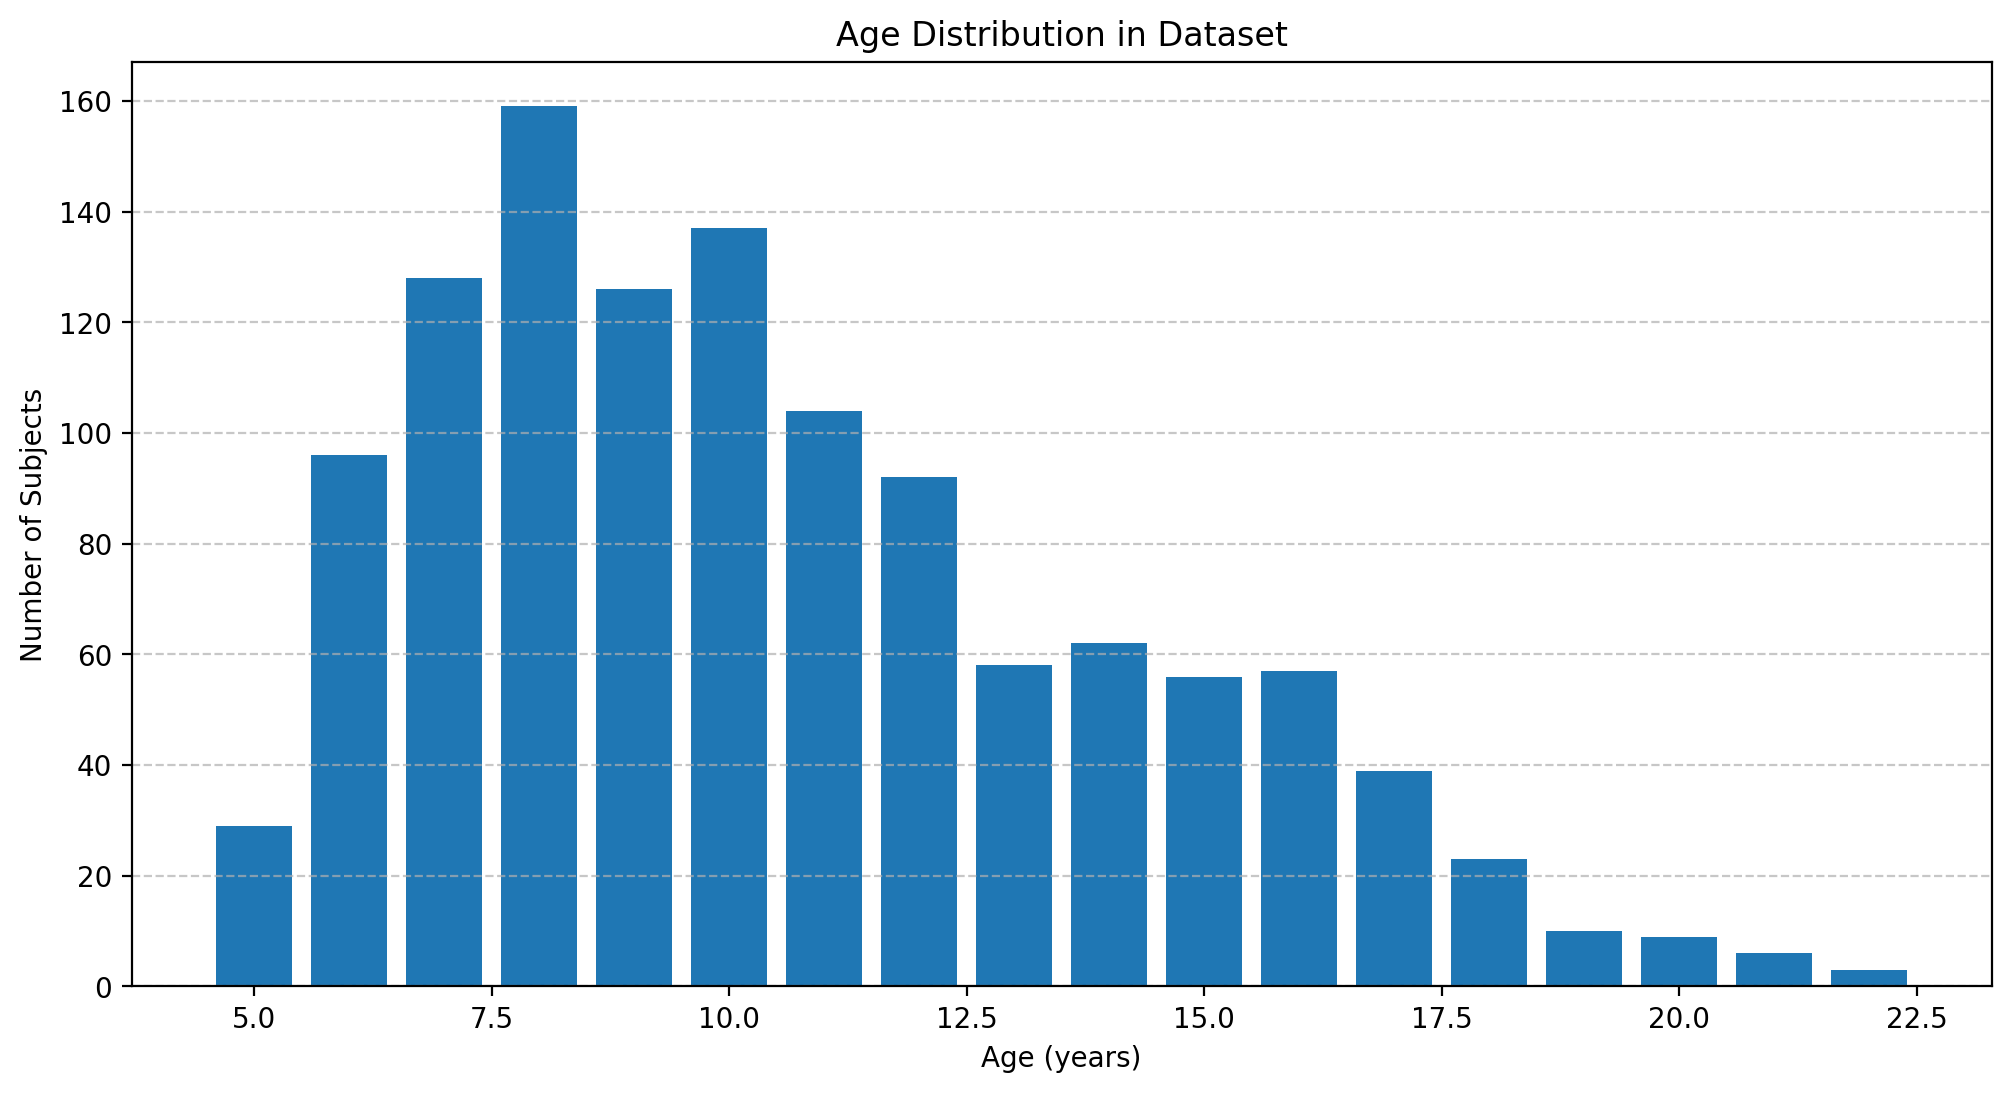

Batch 1 age labels sample: tensor([[ 7.7935],
        [15.4678],
        [ 8.0181],
        [ 8.2612],
        [ 6.4570]])
Batch 2 age labels sample: tensor([[12.8696],
        [ 6.2439],
        [15.4537],
        [ 5.3620],
        [ 9.6055]])
Batch 3 age labels sample: tensor([[11.4350],
        [11.3879],
        [ 6.1893],
        [ 9.6034],
        [ 9.1023]])


In [11]:
# Calculate baseline MAE if we just predict the mean age for everyone
all_ages = []
missing_age_count = 0
total_samples = 0

# Collect all age values from training set
for x, labels in train_loader:
    age_values = labels[:, 0].float().unsqueeze(1)
    
    # Filter out NaN values
    valid_mask = ~torch.isnan(age_values)
    valid_ages = age_values[valid_mask]
    
    # Count missing values
    missing_age_count += (~valid_mask).sum().item()
    
    # Add valid ages to our collection
    all_ages.append(valid_ages)
    
    # Track total samples
    total_samples += age_values.size(0)

# Combine all collected ages
all_ages_tensor = torch.cat(all_ages)
mean_age = all_ages_tensor.mean().item()

# Calculate MAE if we just predict the mean for everyone
baseline_mae = 0
total_valid_samples = 0

for x, labels in val_loader:
    age_values = labels[:, 0].float().unsqueeze(1)
    
    # Filter out NaN values
    valid_mask = ~torch.isnan(age_values)
    valid_ages = age_values[valid_mask]
    
    if valid_ages.size(0) > 0:
        # Calculate MAE for this batch using mean prediction
        batch_mae = torch.abs(valid_ages - mean_age).mean().item()
        baseline_mae += batch_mae * valid_ages.size(0)
        total_valid_samples += valid_ages.size(0)

# Calculate overall MAE
if total_valid_samples > 0:
    baseline_mae /= total_valid_samples

print(f"Total samples: {total_samples}")
print(f"Missing age values (NaN): {missing_age_count} ({missing_age_count/total_samples*100:.2f}%)")
print(f"Mean age in training set: {mean_age:.2f} years")
print(f"Baseline MAE (always predicting mean): {baseline_mae:.4f}")

# Count subjects by age (rounded to nearest year)
age_counts = {}
for age in all_ages_tensor:
    rounded_age = round(age.item())
    if rounded_age in age_counts:
        age_counts[rounded_age] += 1
    else:
        age_counts[rounded_age] = 1

# Sort by age and print
print("\nSubject count by age (rounded to nearest year):")
for age in sorted(age_counts.keys()):
    print(f"Age {age}: {age_counts[age]} subjects")

# Visualize age distribution
plt.figure(figsize=(12, 6))
ages = list(age_counts.keys())
counts = list(age_counts.values())
plt.bar(ages, counts)
plt.xlabel('Age (years)')
plt.ylabel('Number of Subjects')
plt.title('Age Distribution in Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print a few examples of age labels
for i, (x, labels) in enumerate(train_loader):
    age_labels = labels[:, 0].float().unsqueeze(1)
    print(f"Batch {i+1} age labels sample: {age_labels[:5]}")
    if i >= 2:  # Just show first few batches
        break

In [12]:
torch_dataset_fa, train_loader_fa, test_loader_fa, val_loader_fa = prep_fa_dataset(
        dataset, target_labels="dki_fa", batch_size=128
)

FA indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [13]:
print(train_loader_fa.dataset[0][0].shape)

torch.Size([48, 50])


torch.Size([48, 50])
[[0.2543908  0.29688987 0.31666794 0.34054002 0.36838824 0.39247036
  0.41314122 0.4317051  0.45090663 0.46568495 0.4754733  0.48492494
  0.49249756 0.5009555  0.5054681  0.50933975 0.5098809  0.5094924
  0.5098962  0.5085203  0.5053735  0.5033121  0.5005382  0.4961821
  0.49030006 0.48576802 0.48225123 0.48106122 0.48069236 0.47860724
  0.47898507 0.47676376 0.47330487 0.46882278 0.4638844  0.4597217
  0.4564172  0.45626226 0.4557767  0.45371416 0.45248315 0.45247012
  0.4557929  0.46008244 0.46560594 0.4727641  0.47806212 0.48512608
  0.49202597 0.5024611 ]
 [0.50597197 0.51035917 0.515858   0.5202618  0.5215879  0.5214674
  0.52157867 0.5223385  0.52343917 0.5231734  0.52363896 0.5258796
  0.52633333 0.5283325  0.5341363  0.54340637 0.55249506 0.56243044
  0.569587   0.5755458  0.57767904 0.58352995 0.57936543 0.5766711
  0.5716336  0.5671822  0.5589665  0.55013007 0.5432765  0.5375408
  0.5326045  0.52766836 0.5231861  0.51828945 0.5134728  0.5055033
  0.495453

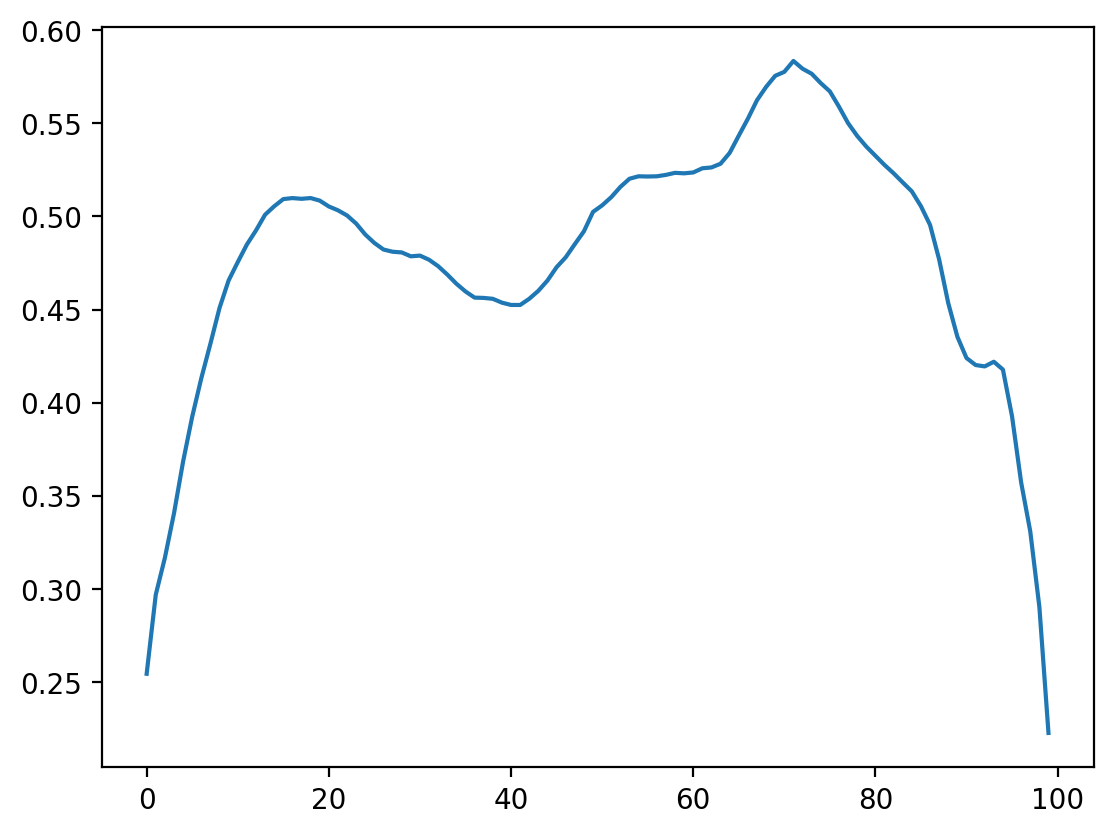

In [14]:
# Print the shape of the first sample's FA tract data
print(train_loader_fa.dataset[0][0].shape)

# Convert the first sample's FA tract data to a numpy array
arr = np.array(train_loader_fa.dataset[0][0])

# Print the first two tracts' data
print(arr[:2, :])

# Concatenate the first two tracts along axis 0 (stacking them vertically)
np.concatenate(arr[:2, :], axis=0)

# Plot the concatenated tracts data, transposed to show each tract as a line
plt.plot(np.concatenate(arr[:2, :], axis=0).T)
plt.show()



In [15]:
site_idx = dataset.target_cols.index('scan_site_id')
sex_idx = dataset.target_cols.index('sex')
age_idx = dataset.target_cols.index('age')

In [16]:
print(f"Sex index: {sex_idx}")

Sex index: 1


In [17]:
torch_dataset, all_tracts_train_loader, all_tracts_test_loader, all_tracts_val_loader = prep_fa_flattned_data(dataset, batch_size=128)

print(all_tracts_train_loader.dataset[0][1][2])

FA indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [18]:
# Assuming you've already loaded the dataset
# Example: omit site with ID 3.0

# First, check which site indices are available in your dataset
omit_site_idx = 1.0

# Then prepare the data while omitting site 3.0
torch_dataset_fa, train_loader_raw, test_loader_raw, val_loader_raw = prep_fa_flattened_remapped_data(
    dataset, 
    batch_size=128,
    site_col_name='scan_site_id',
    age_col_name='age',
    omit_site_idx=omit_site_idx  # Specify the site ID to omit
)


FA indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [19]:
# Get the first item from the dataset
data_item = train_loader_raw.dataset[0]
# Print the item and its shape
print("Data item:", data_item)
print("Data shape:", data_item[0].shape)
print("Labels shape:", data_item[1].shape)

Data item: (tensor([[0.2205, 0.2765, 0.3148, 0.3381, 0.3376, 0.3383, 0.3425, 0.3502, 0.3659,
         0.3809, 0.3890, 0.4016, 0.4167, 0.4271, 0.4346, 0.4392, 0.4453, 0.4517,
         0.4585, 0.4664, 0.4727, 0.4820, 0.4902, 0.5008, 0.5096, 0.5077, 0.4999,
         0.5005, 0.4857, 0.4679, 0.4567, 0.4389, 0.4236, 0.4149, 0.4055, 0.3983,
         0.3884, 0.3774, 0.3691, 0.3653, 0.3577, 0.3542, 0.3585, 0.3585, 0.3511,
         0.3506, 0.3520, 0.3579, 0.3689, 0.3774, 0.3883, 0.4062, 0.4208, 0.4369,
         0.4483, 0.4595, 0.4654, 0.4817, 0.4870, 0.4849, 0.4842, 0.4973, 0.5013,
         0.5097, 0.5236, 0.5331, 0.5334, 0.5338, 0.5311, 0.5347, 0.5422, 0.5416,
         0.5408, 0.5450, 0.5405, 0.5324, 0.5325, 0.5280, 0.5182, 0.5143, 0.5087,
         0.5028, 0.4962, 0.4867, 0.4795, 0.4724, 0.4610, 0.4427, 0.4289, 0.4079,
         0.3889, 0.3756, 0.3724, 0.3666, 0.3695, 0.3559, 0.3427, 0.3241, 0.2948,
         0.2320]]), tensor([6.9750, 1.0000, 0.0000]))
Data shape: torch.Size([1, 100])
Labels sha

In [20]:
# print("Preparing initial PyTorch data loaders...")
# try:
#     # Assuming prep_pytorch_data returns torch_dataset, train_loader, test_loader, val_loader
#     # If it returns datasets, create loaders here.
#     # Adapt this call based on the actual signature and return values of your prep_pytorch_data
#     prep_output = prep_fa_flattened_remapped_data(dataset, batch_size=128, omit_site_idx=1)
#     if len(prep_output) == 4:
#         _, train_loader_raw, test_loader_raw, val_loader_raw = prep_output
#     else:
#         raise ValueError(f"Expected 4 return values from prep_pytorch_data, got {len(prep_output)}")

#     print("Initial data loaders prepared.")
# except Exception as e:
#      print(f"Error calling prep_pytorch_data: {e}")
#      print("Ensure the function exists and returns DataLoaders or required components.")
#      sys.exit(1)

Total samples: 55104
Missing age values (NaN): 0 (0.00%)
Mean age in training set: 0.70 years
Baseline MAE (always predicting mean): 0.6234

Subject count by age (rounded to nearest year):
Age 0: 24672 subjects
Age 1: 22272 subjects
Age 2: 8160 subjects


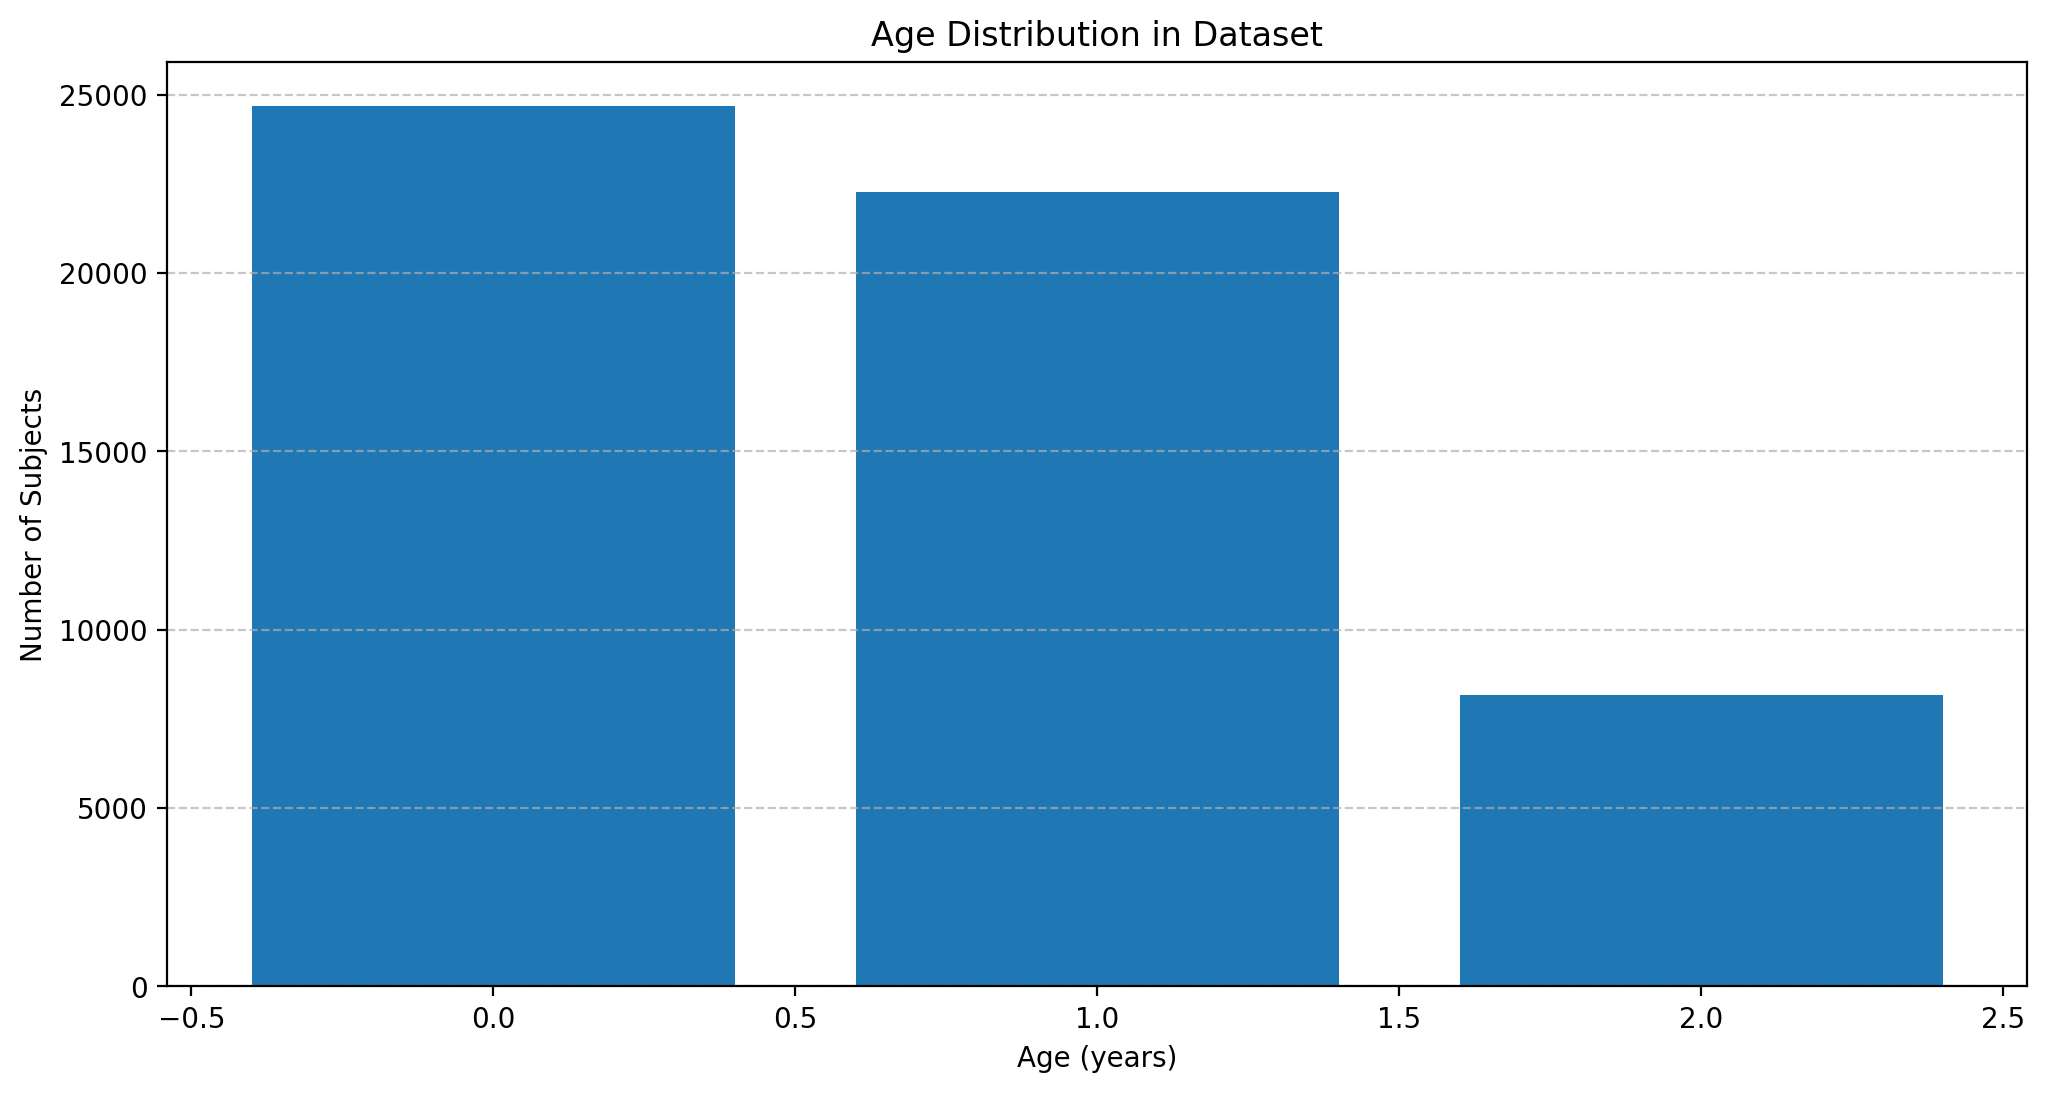

Batch 1 age labels sample: tensor([[15.7246],
        [12.7842],
        [ 5.7012],
        [ 7.7328],
        [ 5.9861]])
Batch 2 age labels sample: tensor([[18.0907],
        [18.3968],
        [ 7.5958],
        [ 6.3612],
        [10.8239]])
Batch 3 age labels sample: tensor([[10.5692],
        [ 6.5178],
        [10.6815],
        [ 7.8703],
        [ 7.5576]])


In [21]:
# Calculate baseline MAE if we just predict the mean age for everyone
all_ages = []
missing_age_count = 0
total_samples = 0

# Collect all age values from training set
for x, labels in train_loader_raw:
    age_values = labels[:, 2].float().unsqueeze(1)
    
    # Filter out NaN values
    valid_mask = ~torch.isnan(age_values)
    valid_ages = age_values[valid_mask]
    
    # Count missing values
    missing_age_count += (~valid_mask).sum().item()
    
    # Add valid ages to our collection
    all_ages.append(valid_ages)
    
    # Track total samples
    total_samples += age_values.size(0)

# Combine all collected ages
all_ages_tensor = torch.cat(all_ages)
mean_age = all_ages_tensor.mean().item()

# Calculate MAE if we just predict the mean for everyone
baseline_mae = 0
total_valid_samples = 0

for x, labels in val_loader_raw:
    age_values = labels[:, 2].float().unsqueeze(1)
    
    # Filter out NaN values
    valid_mask = ~torch.isnan(age_values)
    valid_ages = age_values[valid_mask]
    
    if valid_ages.size(0) > 0:
        # Calculate MAE for this batch using mean prediction
        batch_mae = torch.abs(valid_ages - mean_age).mean().item()
        baseline_mae += batch_mae * valid_ages.size(0)
        total_valid_samples += valid_ages.size(0)

# Calculate overall MAE
if total_valid_samples > 0:
    baseline_mae /= total_valid_samples

print(f"Total samples: {total_samples}")
print(f"Missing age values (NaN): {missing_age_count} ({missing_age_count/total_samples*100:.2f}%)")
print(f"Mean age in training set: {mean_age:.2f} years")
print(f"Baseline MAE (always predicting mean): {baseline_mae:.4f}")

# Count subjects by age (rounded to nearest year)
age_counts = {}
for age in all_ages_tensor:
    rounded_age = round(age.item())
    if rounded_age in age_counts:
        age_counts[rounded_age] += 1
    else:
        age_counts[rounded_age] = 1

# Sort by age and print
print("\nSubject count by age (rounded to nearest year):")
for age in sorted(age_counts.keys()):
    print(f"Age {age}: {age_counts[age]} subjects")

# Visualize age distribution
plt.figure(figsize=(12, 6))
ages = list(age_counts.keys())
counts = list(age_counts.values())
plt.bar(ages, counts)
plt.xlabel('Age (years)')
plt.ylabel('Number of Subjects')
plt.title('Age Distribution in Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print a few examples of age labels
for i, (x, labels) in enumerate(train_loader):
    age_labels = labels[:, 0].float().unsqueeze(1)
    print(f"Batch {i+1} age labels sample: {age_labels[:5]}")
    if i >= 2:  # Just show first few batches
        break

In [22]:
unique_sites = set()
for _, labels in train_loader_raw:
    unique_sites.update(labels[:, 2].tolist())
num_sites = len(unique_sites)
print(f"Detected {num_sites} unique site IDs in the data: {sorted(unique_sites)}")

Detected 3 unique site IDs in the data: [0.0, 1.0, 2.0]


In [23]:
print(train_loader_raw.dataset[111][1][2])

tensor(1.)


In [24]:
# Check for missing or zero age labels
missing_age_count = 0
zero_age_count = 0
total_samples = 0

for x, labels in train_loader_raw:
    tract_data = x.to(device, non_blocking=True)
    sex_idx = labels[:, 1].float().unsqueeze(1)
    
    # Count missing (NaN) values
    missing_age_count += torch.isnan(sex_idx).sum().item()
    
    # Count zero values
    zero_age_count += (sex_idx == 0).sum().item()
    
    # Track total number of samples
    total_samples += sex_idx.size(0)

print(f"Total samples: {total_samples}")
print(f"Missing sex labels (NaN): {missing_age_count} ({missing_age_count/total_samples*100:.2f}%)")
print(f"Zero sex values: {zero_age_count} ({zero_age_count/total_samples*100:.2f}%)")

# Print a few examples of age labels
for i, (x, labels) in enumerate(train_loader_raw):
    age_labels = labels[:, 0].float().unsqueeze(1)
    print(f"Batch {i+1} sex labels sample: {age_labels[:5]}")
    if i >= 2:  # Just show first few batches
        break

Total samples: 55104
Missing sex labels (NaN): 0 (0.00%)
Zero sex values: 19728 (35.80%)
Batch 1 sex labels sample: tensor([[11.5822],
        [14.2960],
        [ 9.2085],
        [11.6540],
        [ 9.6330]])
Batch 2 sex labels sample: tensor([[ 7.3331],
        [13.8688],
        [15.6484],
        [10.3065],
        [ 9.0611]])
Batch 3 sex labels sample: tensor([[ 6.8540],
        [11.8565],
        [16.9621],
        [ 9.0333],
        [ 5.8306]])


In [25]:
# Check for missing or zero age labels
missing_age_count = 0
zero_age_count = 0
total_samples = 0

for x, labels in train_loader_raw:
    tract_data = x.to(device, non_blocking=True)
    site_idx = labels[:, 2].float().unsqueeze(1)
    
    # Count missing (NaN) values
    missing_age_count += torch.isnan(site_idx).sum().item()
    
    # Count zero values
    zero_age_count += (site_idx == ).sum().item()
    
    # Track total number of samples
    total_samples += site_idx.size(0)

print(f"Total samples: {total_samples}")
print(f"Missing site labels (NaN): {missing_age_count} ({missing_age_count/total_samples*100:.2f}%)")
print(f"Zero site values: {zero_age_count} ({zero_age_count/total_samples*100:.2f}%)")

# Print a few examples of age labels
for i, (x, labels) in enumerate(train_loader_raw):
    age_labels = labels[:, 0].float().unsqueeze(1)
    print(f"Batch {i+1} site labels sample: {age_labels[:5]}")
    if i >= 2:  # Just show first few batches
        break

SyntaxError: invalid syntax (1221201838.py, line 14)

In [ ]:
# Check for missing or zero age labels
missing_age_count = 0
zero_age_count = 0
total_samples = 0

for x, labels in train_loader_raw:
    tract_data = x.to(device, non_blocking=True)
    age_labels = labels[:, 0].float().unsqueeze(1)
    
    # Count missing (NaN) values
    missing_age_count += torch.isnan(age_labels).sum().item()
    
    # Count zero values
    zero_age_count += (age_labels == 0).sum().item()
    
    # Track total number of samples
    total_samples += age_labels.size(0)
x
print(f"Total samples: {total_samples}")
print(f"Missing age labels (NaN): {missing_age_count} ({missing_age_count/total_samples*100:.2f}%)")
print(f"Zero age values: {zero_age_count} ({zero_age_count/total_samples*100:.2f}%)")

# Print a few examples of age labels
for i, (x, labels) in enumerate(train_loader_raw):
    age_labels = labels[:, 0].float().unsqueeze(1)
    print(f"Batch {i+1} age labels sample: {age_labels[:5]}")
    if i >= 2:  # Just show first few batches
        break

In [ ]:
for i, (x, labels) in enumerate(train_loader_raw):
    batch_size = x.size(0)
    tract_data = x.to(device, non_blocking=True)

    print(f"Batch {i+1} of {len(train_loader_raw)}")
    print(f"x shape: {x.shape}")
    print(f"labels shape: {labels.shape}")
    
    # Print the actual values in labels
    x = 111
    print(f"First 3 label values: {labels[x][0]}, {labels[x][1]}, {labels[x][2]}")

    age_true = labels[:, 0].float().unsqueeze(1).to(device) #for some reason non_blocking=True causes nan values
    sex = labels[:, 1].long().to(device, non_blocking=True) 
    site = labels[:, 2].long().to(device, non_blocking=True) 
    print(f"age_true shape: {age_true.shape}")
    print(f"site_true shape: {site_true.shape}")
    print(f"sex shape: {sex}")
    # Break after first batch to avoid printing too much
    break


In [ ]:
if 'x_batch' in locals() and x_batch is not None:
    input_channels = x_batch.shape[1]
    sequence_length = x_batch.shape[2]
    print(f"Detected input shape: channels={input_channels}, sequence_length={sequence_length}")
else:
    print("Warning: Could not get sample batch to determine input shape.")
    # Set defaults or exit if necessary
    input_channels = 1 # Set manually if needed
    sequence_length = 50 # Set manually if needed (MUST MATCH VAE DECODER OUTPUT)
    print(f"Using default/manual input shape: channels={input_channels}, sequence_length={sequence_length}")

In [ ]:
# ... existing code ...

# ================================================================================
# STAGED TRAINING EXPERIMENT
# ================================================================================
print("\n\n" + "="*80)
print("RUNNING STAGED TRAINING EXPERIMENT")
print("="*80 + "\n")

# Set parameters for the staged experiment
latent_dim = 64  # Choose the larger latent dim
dropout = 0.0  # VAE dropout
age_dropout = 0.0
site_dropout = 0.0
w_recon = 1.0
w_kl = 0.1
w_age = 5.0  # Higher weight for age prediction
w_site = 5.0  # Higher weight for site adversarial training

# Create models
vae = Conv1DVariationalAutoencoder_fa(latent_dims=latent_dim, dropout=dropout)
age_predictor = AgePredictorCNN(input_channels=input_channels, 
                              sequence_length=sequence_length, 
                              dropout=age_dropout)
site_predictor = SitePredictorCNN(num_sites=4, 
                                input_channels=input_channels, 
                                sequence_length=sequence_length, 
                                dropout=site_dropout)

# Define directory for saving staged models
staged_save_directory = "staged_experiment_results"
os.makedirs(staged_save_directory, exist_ok=True)
print(f"Staged experiment results will be saved in: {staged_save_directory}")


    
staged_results = train_vae_age_site_staged(
    vae_model=vae,
    age_predictor=age_predictor,
    site_predictor=site_predictor,
    train_data=train_loader_raw,
    val_data=val_loader_raw,
    epochs_stage1=500,  # For individual training
    epochs_stage2=1000,  # For adversarial training
    lr=0.001,
    device=device,
    max_grad_norm=1.0,
    w_recon=w_recon,
    w_kl=w_kl,
    w_age=w_age,
    w_site=w_site,
    kl_annealing_start_epoch=200,
    kl_annealing_duration=200,
    kl_annealing_start=0.001,
    grl_alpha_start=0.0,
    grl_alpha_end=2.5,
    grl_alpha_epochs=150,
    save_dir=staged_save_directory,
    val_metric_to_monitor="val_age_mae"
)

def process_metrics(metrics_dict, keys_to_convert):
    processed_results = {}
    for key in keys_to_convert:
        metric_list = metrics_dict.get(key, [])
        new_list = []
        if isinstance(metric_list, (list, tuple)):
            for val in metric_list:
                if isinstance(val, torch.Tensor):
                    new_list.append(float(val.cpu().item()))
                elif isinstance(val, (int, float, np.number)):
                    new_list.append(float(val))
                else:
                    new_list.append(float('nan'))
        processed_results[key] = new_list
    return processed_results

# Process and save VAE Stage 1 results
if staged_results and "vae" in staged_results:
    vae_results = staged_results["vae"]
    
    # Keys to convert for VAE metrics
    vae_keys = [
        "train_loss_epoch", "val_loss_epoch",
        "train_recon_loss_epoch", "val_recon_loss_epoch",
        "train_kl_loss_epoch", "val_kl_loss_epoch",
        "current_beta_epoch", "current_lr_epoch"
    ]
    
    vae_processed = process_metrics(vae_results, vae_keys)
    
    # Create DataFrame for VAE metrics
    vae_epochs = len(vae_processed.get("train_loss_epoch", []))
    if vae_epochs > 0:
        vae_df_data = {"epoch": range(1, vae_epochs + 1)}
        for k in vae_keys:
            col_name = k.replace('_epoch', '')
            vae_df_data[col_name] = vae_processed.get(k, [float('nan')] * vae_epochs)
        
        vae_df = pd.DataFrame(vae_df_data)
        vae_metrics_file = os.path.join(staged_save_directory, "vae_metrics.csv")
        vae_df.to_csv(vae_metrics_file, index=False)
        print(f"Saved VAE training metrics to {vae_metrics_file}")
    

# Process and save Age Predictor Stage 1 results
if staged_results and "age_predictor" in staged_results:
    age_results = staged_results["age_predictor"]
    
    # Keys to convert for Age Predictor metrics
    age_keys = ["train_loss_epoch", "val_loss_epoch", "current_lr_epoch"]
    
    age_processed = process_metrics(age_results, age_keys)
    
    # Create DataFrame for Age Predictor metrics
    age_epochs = len(age_processed.get("train_loss_epoch", []))
    if age_epochs > 0:
        age_df_data = {"epoch": range(1, age_epochs + 1)}
        for k in age_keys:
            col_name = k.replace('_epoch', '')
            age_df_data[col_name] = age_processed.get(k, [float('nan')] * age_epochs)
        
        age_df = pd.DataFrame(age_df_data)
        age_metrics_file = os.path.join(staged_save_directory, "age_predictor_metrics.csv")
        age_df.to_csv(age_metrics_file, index=False)
        print(f"Saved Age Predictor training metrics to {age_metrics_file}")

# Process and save Site Predictor Stage 1 results
if staged_results and "site_predictor" in staged_results:
    site_results = staged_results["site_predictor"]
    
    # Keys to convert for Site Predictor metrics
    site_keys = ["train_loss_epoch", "val_loss_epoch", "train_acc_epoch", "val_acc_epoch", "current_lr_epoch"]
    
    site_processed = process_metrics(site_results, site_keys)
    
    # Create DataFrame for Site Predictor metrics
    site_epochs = len(site_processed.get("train_loss_epoch", []))
    if site_epochs > 0:
        site_df_data = {"epoch": range(1, site_epochs + 1)}
        for k in site_keys:
            col_name = k.replace('_epoch', '')
            site_df_data[col_name] = site_processed.get(k, [float('nan')] * site_epochs)
        
        site_df = pd.DataFrame(site_df_data)
        site_metrics_file = os.path.join(staged_save_directory, "site_predictor_metrics.csv")
        site_df.to_csv(site_metrics_file, index=False)
        print(f"Saved Site Predictor training metrics to {site_metrics_file}")

# Process and save combined stage results
if staged_results and "combined" in staged_results:
    combined_results = staged_results["combined"]
    
    # Convert metrics to CPU floats
    keys_to_convert = [
        "train_loss_epoch", "val_loss_epoch", 
        "train_recon_loss_epoch", "val_recon_loss_epoch",
        "train_kl_loss_epoch", "val_kl_loss_epoch", 
        "train_age_loss_epoch", "val_age_loss_epoch",
        "train_site_loss_epoch", "val_site_loss_epoch", 
        "train_age_mae_epoch", "val_age_mae_epoch",
        "train_site_acc_epoch", "val_site_acc_epoch", 
        "current_beta_epoch", "current_grl_alpha_epoch",
        "current_lr_epoch"
    ]
    
    processed_results = process_metrics(combined_results, keys_to_convert)
    
    # Create DataFrame
    num_epochs = len(processed_results.get("train_loss_epoch", []))
    if num_epochs > 0:
        df_data = {"epoch": range(1, num_epochs + 1)}
        for k in keys_to_convert:
            col_name = k.replace('_epoch', '')
            metric_data = processed_results.get(k, [])
            if len(metric_data) != num_epochs:
                metric_data = [float('nan')] * num_epochs
            df_data[col_name] = metric_data
        
        df_epochs = pd.DataFrame(df_data)
        metrics_file = os.path.join(staged_save_directory, "staged_combined_metrics.csv")
        df_epochs.to_csv(metrics_file, index=False)
        
        # Save summary metrics
        best_mae_key = "best_val_age_mae"
        best_mae = combined_results.get(best_mae_key, float('nan'))
        if isinstance(best_mae, torch.Tensor):
            best_mae = float(best_mae.cpu().item())
        
        df_summary = pd.DataFrame([{
            best_mae_key: best_mae,
            "best_epoch": combined_results.get("best_epoch", float('nan')),
            "model_path": combined_results.get("model_path", "N/A")
        }])
        summary_file = os.path.join(staged_save_directory, "staged_combined_summary.csv")
        df_summary.to_csv(summary_file, index=False)
        
        print(f"Saved staged training metrics to {metrics_file}")
        print(f"Saved staged training summary to {summary_file}")

print("\n" + "="*80)
print("Staged training experiment complete!")
print("="*80 + "\n")